# Chapter 1 problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

## P.1. Duffing Oscillator

Let us first write a program to compute $x(t)$ for given parameters of Duffing Oscillator. 

$$ m\frac{d^2 x(t) }{dt^2} = F(x,\dot{x},t)$$
$$ F(x,\dot{x},t) = -\gamma \dot{x} +2 a x -4 b x^3 +F_0 \cos(\omega t) $$

__the parameters given in the book seems to be not correct__

In [2]:
def Duffing_Oscillator(t_list,x0=0.5,v0=0.,m=1.0,gamma=0.1,a=1./2.,b=1./4.,F0=0.39,omega=1.4):
    """
    t_list : list of time of x(t) 
    x0, v0 : initial condition of x(0) and $\dot{x}(0)$
    """
    def duff_eq(y,t):
        x, v = y
        dydt = [ v, 1/m*(-gamma*v+2*a*x-4*b*x**3+F0*np.cos(omega*t))]
        return dydt 
    
    sol = odeint(duff_eq, [x0,v0], t_list)
    return sol 

### 1.1. (a) and (b)

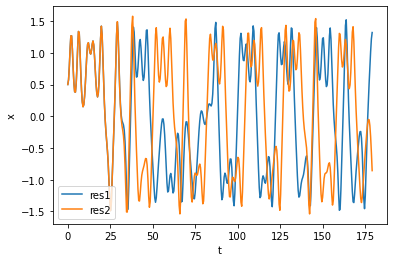

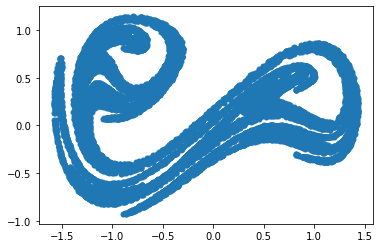

In [3]:
#-----run-------------------------
omega=1.4
period = 2*np.pi/omega
dt_per_period = 10
number_of_periods= 20000

t_list = np.arange(0.,number_of_periods*period,period/dt_per_period)
res1 = Duffing_Oscillator(t_list,x0=0.5,v0=0.,m=1.0,gamma=0.1,a=1./2.,b=1./4.,F0=0.39,omega=1.4)
res2 = Duffing_Oscillator(t_list,x0=0.5001,v0=0.,m=1.0,gamma=0.1,a=1./2.,b=1./4.,F0=0.39,omega=1.4)

max_plot_dt = 400
plt.figure()
plt.plot(t_list[:max_plot_dt],res1[:max_plot_dt,0],label='res1')
plt.plot(t_list[:max_plot_dt],res2[:max_plot_dt,0],label='res2')
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

# phase plot 
plt.figure()
xx = res1[0::dt_per_period,0]
vv = res1[0::dt_per_period,1]
plt.scatter(xx,vv,lw=0)

### 1.1. (c) and (d)

Fractal dimension $D_f$ of a plot is 
$$ N(b) \propto b^{-D_f}$$,
where $N(b)$ is a number of squares (b x b) cover the area.

Let the full canvas is size of L=4 square. (x=(-2,2))

In [59]:
n_grid = 10
x_grids = np.linspace(-2,2,n_grid+1) 
y_grids = np.linspace(-2,2,n_grid+1)
yy=vv
box_mat = np.zeros( (n_grid,n_grid))
for i in range(len(xx)):
    xn = np.where(x_grids > xx[i])[0][0] # first xn such that x_grid[xn]> xx[i]
    yn = np.where(y_grids > yy[i])[0][0] 
    #--now the point (xx[i],yy[i]) belongs to (xn-1,yn-1)
    box_mat[xn-1,yn-1]=1 # fill the box 

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [61]:
x_grids

array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ])

In [56]:
(x_grids[0:10] > xx[0])

AttributeError: 'numpy.ndarray' object has no attribute 'find'

In [9]:
# From https://github.com/rougier/numpy-100 (#87)
def boxcount(Z, k):
    #---assume Z[i,j] = emptry(0) or filled(1) 
    #---then sum over k-elements dividing the each direction in index of Z 
    #---(if the sum==0, all k xk box is empty) 
    #---(if the sum==k*k, all k*k box is fully filled.) 
    #---count the number of non-empty, non-full k*k boxes in Z. 
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])